
# Precessing Jet - Interactive 3D View
### Robert Cameron
### March 2016


Implement the precessing jet model of
Vincent Icke, 1981, Ap.J. (Letters), 246, L65.
Output stereo views to see a 3D view of the trajectory.

In [1]:
import matplotlib.pyplot as plt
from numpy import sin, cos, radians, sqrt, linspace, exp, pi, append
%matplotlib inline
from ipywidgets import *
from IPython.display import *

In [2]:
a = 90         # a = angle between precession cone axis and line-of-sight (degrees)
b = 70         # b = angle between east and projection of precession cone axis on sky (degrees)
theta = 16     # theta = half angle of precession cone (degrees)
e = (1, 1, 100)  # e = (ex, ey, ez) = velocity of galaxy to the (West, North, Towards Observer
t0 = 0         # t0 = phase of the jet precession (radians)
u0 = 3         # u0 = jet velocity at the nucleus, in units of galaxy velocity relative to ICM
n = 5.0        # n = number of precessions per stopping time

a = radians(a)
b = radians(b)
theta = radians(theta)
sina = sin(a)
sinb = sin(b)
cosa = cos(a)
cosb = cos(b)
sintheta = sin(theta)
costheta = cos(theta)

delta = 5     # delta is the angle between your eyes for the stereo projection (degrees)
delta = radians(delta)
sindelta = sin(delta)
cosdelta = cos(delta)

In [3]:
ex = e[0]
ey = e[1]
ez = e[2]

# convert ex,ey,ez to eu,ev,ew

eu = ex*cosa*cosb-ey*cosa*sinb+ez*sina
ev = ex*sinb+ey*cosb
ew =-ex*sina*cosb+ey*sina*sinb+ez*cosa

# normalise e

norme=sqrt(eu*eu+ev*ev+ew*ew)
eu=eu/norme
ev=ev/norme
ew=ew/norme

# run the dynamics for both jets

t = linspace(0,3,61)
expt=n*(1.0-exp(-t/n))
cost = cos(2*pi*(t0-t))
sint = sin(2*pi*(t0-t))

In [4]:
# do one jet first

su1=-eu*t+(u0*sintheta*cost+eu)*expt
sv1=-ev*t+(u0*sintheta*sint+ev)*expt
sw1=-ew*t+(u0*costheta+ew)*expt

su1 = eu*t-(u0*sintheta*cost+eu)*expt
sv1 = ev*t-(u0*sintheta*sint+ev)*expt
sw1 = ew*t-(u0*costheta+ew)*expt

# project onto the x,y,z axes

x1= su1*cosa*cosb+sv1*sinb-sw1*sina*cosb
y1=-su1*cosa*sinb+sv1*cosb+sw1*sina*sinb
z1= su1*sina+sw1*cosa

# project onto the x',y',z' axes

xd1= x1*cosdelta+z1*sindelta
yd1= y1
zd1=-x1*sindelta+z1*cosdelta

# now do the opposite jet

su2=-eu*t-(u0*sintheta*cost-eu)*expt
sv2=-ev*t-(u0*sintheta*sint-ev)*expt
sw2=-ew*t-(u0*costheta-ew)*expt

# project onto the x,y,z axes

x2= su2*cosa*cosb+sv2*sinb-sw2*sina*cosb
y2=-su2*cosa*sinb+sv2*cosb+sw2*sina*sinb
z2= su2*sina+sw2*cosa

# project onto the x',y',z' axes

xd2= x2*cosdelta+z2*sindelta
yd2= y2
zd2=-x2*sindelta+z2*cosdelta

In [5]:
xd = append(xd1[::-1], xd2)
yd = append(yd1[::-1], yd2)
zd = append(zd1[::-1], zd2)
x = append(x1[::-1], x2)
y = append(y1[::-1], y2)
z = append(z1[::-1], z2)

interactive(children=(IntSlider(value=0, description='i', max=180, min=-180), Output()), _dom_classes=('widget…

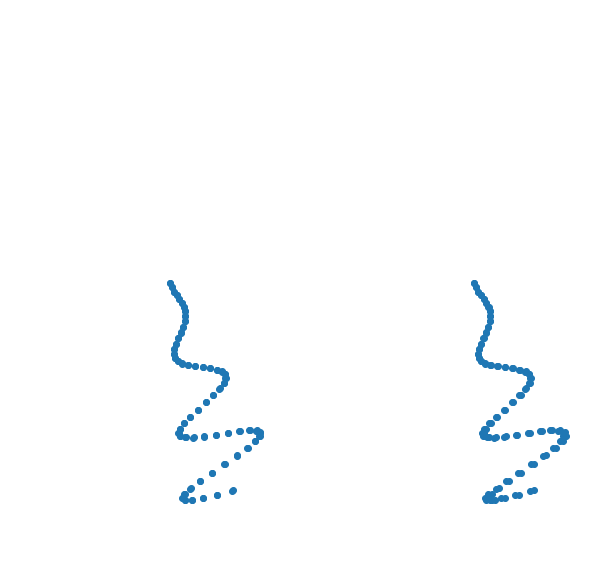

In [6]:
fig2, (sp1, sp2) = plt.subplots(1, 2, subplot_kw=dict(frame_on=False),figsize=(10,10))
jet1, = sp1.plot(x,y,'o')
jet2, = sp2.plot(xd,y,'o')
sp1.axis('off')
sp2.axis('off')
sp1.set_xlim(-5,4)
sp2.set_xlim(-5,4)
sp1.set_ylim(-8,8)
sp2.set_ylim(-8,8)

def update(i):
    t0 = radians(i)
    cost = cos(2*pi*(t0-t))
    sint = sin(2*pi*(t0-t))
    
    a = radians(i+90)
    sina = sin(a)
    cosa = cos(a)
       
    # do one jet first

    su1=-eu*t+(u0*sintheta*cost+eu)*expt
    sv1=-ev*t+(u0*sintheta*sint+ev)*expt
    sw1=-ew*t+(u0*costheta+ew)*expt
    
    # project onto the x,y,z axes

    x1= su1*cosa*cosb+sv1*sinb-sw1*sina*cosb
    y1=-su1*cosa*sinb+sv1*cosb+sw1*sina*sinb
    z1= su1*sina+sw1*cosa

    # project onto the x',y',z' axes

    xd1= x1*cosdelta+z1*sindelta
    yd1= y1
#    zd1=-x1*sindelta+z1*cosdelta

    # now do the opposite jet

    su2=-eu*t-(u0*sintheta*cost-eu)*expt
    sv2=-ev*t-(u0*sintheta*sint-ev)*expt
    sw2=-ew*t-(u0*costheta-ew)*expt

    # project onto the x,y,z axes

    x2= su2*cosa*cosb+sv2*sinb-sw2*sina*cosb
    y2=-su2*cosa*sinb+sv2*cosb+sw2*sina*sinb
    z2= su2*sina+sw2*cosa

    # project onto the x',y',z' axes

    xd2= x2*cosdelta+z2*sindelta
    yd2= y2
#   zd2=-x2*sindelta+z2*cosdelta
    
    xd = append(xd1[::-1], xd2)
    yd = append(yd1[::-1], yd2)
#    zd = append(zd1[::-1], zd2)
    x = append(x1[::-1], x2)
    y = append(y1[::-1], y2)
#    z = append(z1[::-1], z2)

    jet1.set_xdata(x)
    jet1.set_ydata(y)
    jet2.set_xdata(xd)
    jet2.set_ydata(y)

    display(fig2)
                
interactive(update, i=(-180, 180))